# Homework2

## 1.Feedforward： Building a ReLU neural network

### 1) Draw the network
![](images/2019-10-31.png)

### 2) Mathematical equation for the output of the network

$$\begin{align*}
\hat y = Sigmoid(z^3_1 + c) = Sigmoid(h_1\cdot v_{11}+h_2\cdot v_{21}+h_3\cdot v_{31}+c)\\
h_1 = ReLU(z^2_1 + b_1) = ReLU(x_1\cdot w_{11}+x_2\cdot w_{21}+b_1)\\
h_2 = ReLU(z^2_2 + b_2) = ReLU(x_1\cdot w_{12}+x_2\cdot w_{22}+b_2)\\
h_3 = ReLU(z^2_3 + b_3) = ReLU(x_1\cdot w_{13}+x_2\cdot w_{23}+b_3)
\end{align*}$$

### 3) Forward-pass function ff_nn_ReLu(...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ff_nn_ReLu(X, W, V, B, C):
    return Sigmoid(np.dot(ReLU(np.dot(X, W)+B), V)+C)

def ReLU(X):
    return np.maximum(X, 0)

def Sigmoid(X):
    return 1/(1 + np.exp(-X))

### 4) Calculate class probabilities

In [23]:
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1., -1., 0.], [0., 0., 0.5]])
V = np.array([[1.], [0.], [-1.]])
B = np.array([0., 0., 1.])
C = np.array([1.])
ff_nn_ReLu(X, W, V, B, C)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

For the first sample, the class probability is 0.81757448

For the second sample, the class probability is 0.62245933

For the third sample, the class probability is 0.37754067

## 2. Gradient Descent

### 1) Partial derivatives of f with respect to x and to y

$$\begin{align*}
\frac{\partial f(x,y)}{\partial x} = -x^2 + 200x - 200y^2\\
\frac{\partial f(x,y)}{\partial y} = 400y^3 - 400xy
\end{align*}$$

### 2) Visualization of the contours of this function

Text(0.5, 1.0, 'Contours of f(x,y)')

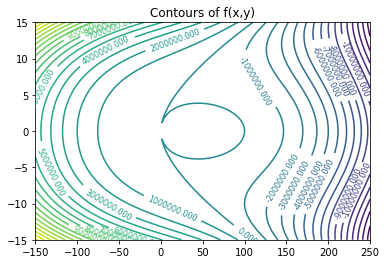

In [16]:
def f(x_and_y):
    x, y = x_and_y
    return (1-x**3)+100*((y**2-x)**2)

delta = 1000
x = np.linspace(-150, 250, delta)
y = np.linspace(-15, 15, delta)
X, Y = np.meshgrid(x, y)
Z = f([X,Y])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 40)
ax.clabel(CS, inline=1, fontsize=8)
ax.set_title('Contours of f(x,y)')

### 3) Gradient Descent and Visualization

In [5]:
def grad_descent(starting_point, iter, lr):
    result = starting_point
    trajectory = [result]
    fs = [f(starting_point)]
    for i in range(iter):
        result = result - lr * grad_f(result)
        trajectory.append(result)
        fs.append(f(result))
    return np.array(trajectory), fs

def grad_f(x_and_y):
    x, y = x_and_y
    dfdx = -(x**2)+200*x-200*(y**2)
    dfdy = 400*(y**3)-400*x*y
    return np.array([dfdx, dfdy])

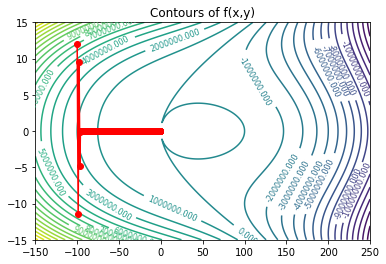

In [6]:
# learning rate = 0.00002
trajs, fs = grad_descent([-100, 12], 1000, 0.00002)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

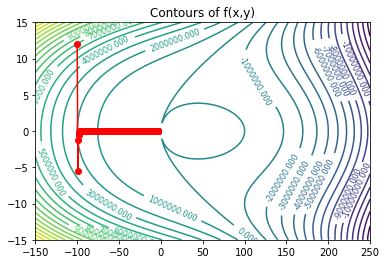

In [8]:
# learning rate = 0.000015
trajs, fs = grad_descent([-100, 12], 1000, 0.000015)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

### 4) Gradient Descent with Momentum and Visualization

In [10]:
def grad_descent_with_momentum(starting_point, iter, lr, alpha):
    result = starting_point
    trajectory = [result]
    fs = [f(starting_point)]
    v = 0
    for i in range(iter):
        v = alpha*v - lr*grad_f(result)
        result = result + v
        trajectory.append(result)
        fs.append(f(result))
    return np.array(trajectory), fs

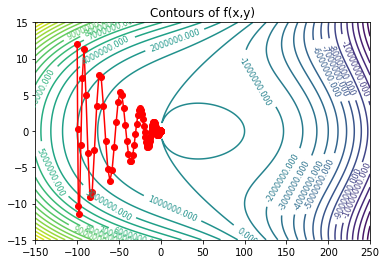

In [11]:
# learning rate = 0.00001, alpha = 0.9
trajs, fs = grad_descent_with_momentum([-100, 12], 1000, 0.00001, 0.9)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

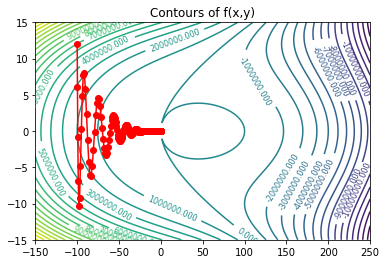

In [13]:
# learning rate = 0.000005, alpha = 0.9
trajs, fs = grad_descent_with_momentum([-100, 12], 1000, 0.000005, 0.9)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

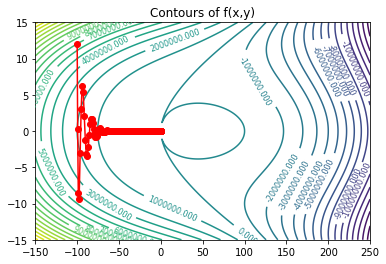

In [15]:
# learning rate = 0.00001, alpha = 0.75
trajs, fs = grad_descent_with_momentum([-100, 12], 1000, 0.00001, 0.75)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

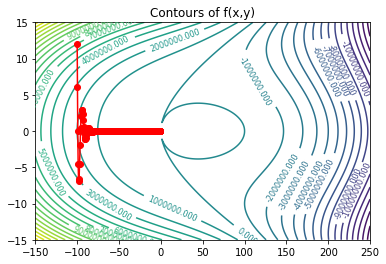

In [17]:
# learning rate = 0.000005, alpha = 0.75
trajs, fs = grad_descent_with_momentum([-100, 12], 1000, 0.000005, 0.75)
ax.plot(trajs[:, 0], trajs[:, 1], color='RED', marker='o')
fig

## 3.Backprop

### 1) Expressions of the gradient

$$\begin{align*}
\theta = \{ w_{11}, w_{12}, w_{13}, w_{21}, w_{22}, w_{23}, v_{11}, v_{21}, v_{31}, b, c\}\\
L = -y_ilog(\hat y_i)-(1-y_i)log(1-\hat y_i)
\end{align*}$$

$$\delta^L = \frac{\partial L}{\partial\hat y}\cdot\frac{\partial\hat y}{\partial z^3_1} = \left[-\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))\right]$$

$$\frac{\partial L}{\partial c}= \delta^L = \left[-\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))\right]$$

$$
\begin{align*}
\frac{\partial L}{\partial V}
&= H^T\delta^L \\
&= \left[\begin{matrix}
 h_1\\h_2\\h_3
 \end{matrix}\right]
 \left[-\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right)\cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\right]
\\
&= \left[\begin{matrix}
   -h_1\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\\
   -h_2\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\\
   -h_3\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))
  \end{matrix}\right]\\
 \end{align*}
$$

$$
\begin{align*}
\delta^2 &= V^T\delta^L \odot\sigma'(z^2)\\
&=\left[\begin{matrix}v_1\\v_2\\v_3\end{matrix}\right]^T
\left[-\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))\right]
\odot 
\left[\begin{matrix}ReLU'(z^2_1)\\ReLU'(z^2_2)\\ReLU'(z^2_3)\end{matrix}\right]^T\\
&=\left[\begin{matrix}
 -v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
 - v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
  - v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)
 \end{matrix}\right]^T
 \end{align*}
$$

$$
\frac{\partial L}{\partial b}=\delta^2 = \left[\begin{matrix}
 -v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
  -v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
   -v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)
 \end{matrix}\right]^T
$$

$$
\begin{align*}
\frac{\partial L}{\partial W}
&= X^T\delta^2\\
&= \begin{bmatrix}x_1\\x_2\end{bmatrix}
\begin{bmatrix}
    -v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
    -v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
    -v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)
\end{bmatrix}^T
\end{align*}
$$

Therefore:

$$
\begin{align*}
\nabla_\theta &= \left\{
\frac{\partial L}{\partial w_{11}},
\frac{\partial L}{\partial w_{12}},
\frac{\partial L}{\partial w_{13}},
\frac{\partial L}{\partial w_{21}},
\frac{\partial L}{\partial w_{22}},
\frac{\partial L}{\partial w_{23}},
\frac{\partial L}{\partial v_{11}},
\frac{\partial L}{\partial v_{21}},
\frac{\partial L}{\partial v_{31}},
\frac{\partial L}{\partial b_1},
\frac{\partial L}{\partial b_2},
\frac{\partial L}{\partial b_3},
\frac{\partial L}{\partial c}
\right\}\\
&=\left\{
 \begin{matrix}
 -x_1 v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
  -x_1 v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
   -x_1 v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)\\
 -x_2 v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
  -x_2 v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
   -x_2 v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)\\
   -h_1\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\\
   -h_2\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\\
   -h_3\left (\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot \sigma(z^3_1)\cdot(1-\sigma(z^3_1))\\
   -v_1\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_1)\\
   -v_2\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_2)\\
   -v_3\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))ReLU'(z^2_3)\\
   -\left(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i}\right) \cdot\sigma(z^3_1)\cdot(1-\sigma(z^3_1))
  \end{matrix}
  \right\}
\end{align*}
$$

### 2) Function grad_f(...)

In [18]:
def ReLU_d(x):
    return 1 * (x > 0)
    
def Sigmoid_d(x):
    t = Sigmoid(x)
    return t * (1 - t)

def Loss(y, y_hat):
    return - y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

def Loss_d(y, y_hat):
    return - (y / y_hat - (1 - y) / (1 - y_hat))

def grad_f(X, Y, W, V, B, C):
    Z2 = np.dot(X, W) + B
    H = ReLU(Z2)
    Z3 = np.dot(H, V) + C
    Y_hat = Sigmoid(Z3)

    delta_L = Loss_d(Y, Y_hat) * Sigmoid_d(Z3)
    dLdC = np.sum(delta_L, axis=0)
    dLdV = np.dot(H.T, delta_L)
    delta_2 = V.T * delta_L * ReLU_d(Z2)
    dLdB = np.sum(delta_2, axis=0)
    dLdW = np.dot(X.T, delta_2)
    return dLdW, dLdV, dLdB, dLdC

### 3) Generate XOR dataset

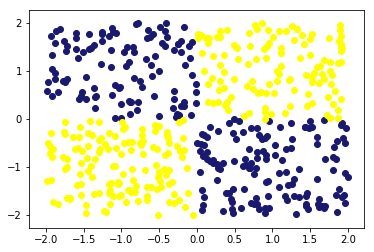

In [19]:
n = 500
np.random.seed(0)
X_train = 4 * np.random.rand(n, 2) - 2
Y_train = np.where(np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0), 1, 0)[:, None]
plt.scatter(X_train[Y_train.flatten() == 1, 0], X_train[Y_train.flatten() == 1, 1], c='midnightblue')
plt.scatter(X_train[Y_train.flatten() == 0, 0], X_train[Y_train.flatten() == 0, 1], c='yellow')
plt.show()

### 4) Fit the network using Gradient Descent

In [20]:
def Gradient_Descent(X_train, Y_train, W, V, B, C, batch_size, max_iter, lr, min_loss):
    epoch = 0
    start = 0
    losses = [np.mean(Loss(Y_train, ff_nn_ReLu(X_train, W, V, B, C)), axis=0)]
    for i in range(max_iter):
        end = start + batch_size
        X = X_train[start:end]
        Y = Y_train[start:end]
        start += batch_size
        if start > len(X_train) - 1:
            start = 0
            epoch += 1

        dLdW, dLdV, dLdB, dLdC = grad_f(X, Y, W, V, B, C)
        W -= lr * dLdW
        V -= lr * dLdV
        B -= lr * dLdB
        C -= lr * dLdC

        loss = np.mean(Loss(Y_train, ff_nn_ReLu(X_train, W, V, B, C)), axis=0)
        losses.append(loss)
        if loss < min_loss:
            break
    return np.array(losses)

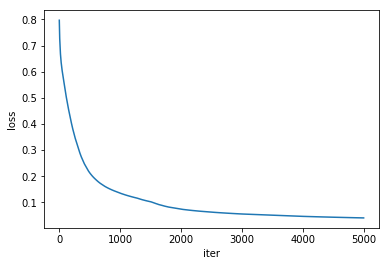

In [21]:
losses = Gradient_Descent(X_train, Y_train, W, V, B, C, batch_size=100, max_iter=5000, lr=0.001, min_loss=1e-10)
plt.plot(losses.flatten())
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

### 5) Fit the network using Gradient Descent with Momentum

In [22]:
def Gradient_Descent_with_Momentum(X_train, Y_train, W, V, B, C, batch_size, max_iter, lr, alpha, min_loss):
    epoch = 0
    start = 0
    losses = [np.mean(Loss(Y_train, ff_nn_ReLu(X_train, W, V, B, C)), axis=0)]
    v_W = np.zeros(shape=W.shape)
    v_V = np.zeros(shape=V.shape)
    v_B = np.zeros(shape=B.shape)
    v_C = np.zeros(shape=C.shape)
    for i in range(max_iter):
        end = start + batch_size
        X = X_train[start:end]
        Y = Y_train[start:end]
        start += batch_size
        if start > len(X_train) - 1:
            start = 0
            epoch += 1

        dLdW, dLdV, dLdB, dLdC = grad_f(X, Y, W, V, B, C)
        v_W = alpha * v_W - lr * dLdW
        v_V = alpha * v_V - lr * dLdV
        v_B = alpha * v_B - lr * dLdB
        v_C = alpha * v_C - lr * dLdC
        W += v_W
        V += v_V
        B += v_B
        C += v_C

        loss = np.mean(Loss(Y_train, ff_nn_ReLu(X_train, W, V, B, C)), axis=0)
        losses.append(loss)
        if loss < min_loss:
            break
    return np.array(losses)

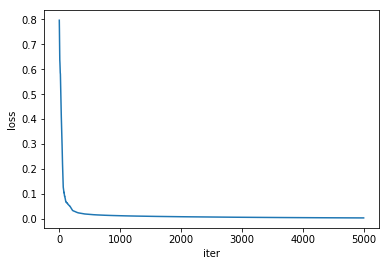

In [24]:
losses = Gradient_Descent_with_Momentum(X_train, Y_train, W, V, B, C, batch_size=100, max_iter=5000, lr=0.001, alpha=0.97, min_loss=1e-10)
plt.plot(losses.flatten())
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

Comparing above two plots of loss changes, we can see that the network with GD with Momentum converges more efficiently than the same network with only GD.

### 6) Visualization of decision boundary

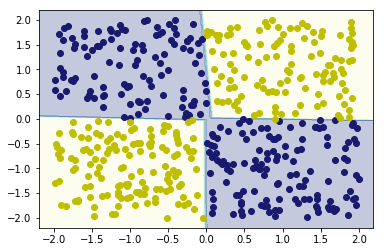

In [25]:
h = 0.01
x1, x2 = np.meshgrid(np.arange(-2.2, 2.2, h), np.arange(-2.2, 2.2, h))
z = ff_nn_ReLu(np.c_[x1.ravel(), x2.ravel()], W, V, B, C)
z = z.reshape(x1.shape)
plt.contourf(x1, x2, z, cmap=plt.cm.YlGnBu, alpha=0.25)
# plt.contour(x1, x2, z, colors='k', linewidths=0.25)
plt.scatter(X_train[Y_train.flatten() == 1, 0], X_train[Y_train.flatten() == 1, 1], c='midnightblue')
plt.scatter(X_train[Y_train.flatten() == 0, 0], X_train[Y_train.flatten() == 0, 1], c='y')
plt.show()